### Graph Isomorphism Problem
Graph Isomorphism Problem is a computational problem in graph theory, where the goal is to determine whether two given graphs are isomorphic, that is, they have the same structure.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import itertools
import numpy as np


In this first section I read graphs from a file and check if they are isomorphic I will use a libaray called NetworkX.
 
NetworkX (nx) is a popular Python library for working with graphs, including testing for graph isomorphism. nx provides a function called is_isomorphic() that takes two nx graphs as input and returns True if they are isomorphic, and False otherwise. 

In [58]:
#reading data from sample graph
with open('data/samplegraph.csv', 'r') as File:
    graph = list(csv.reader(File, delimiter=','))


In [59]:
with open('data/samplegraph2.csv', 'r') as File2:
    graph1 = list(csv.reader(File2, delimiter=','))


In [60]:
with open('data/samplegraph3.csv', 'r') as File2:
    graph2 = list(csv.reader(File2, delimiter=','))


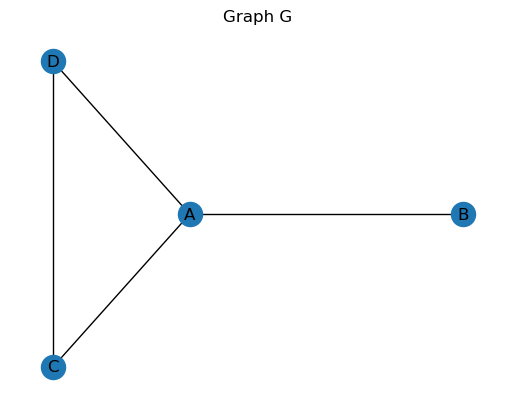

In [61]:
G=nx.Graph()

G.add_edges_from(graph)
plt.title("Graph G")
nx.draw_spectral(G, with_labels=True)
#nx.draw(G)

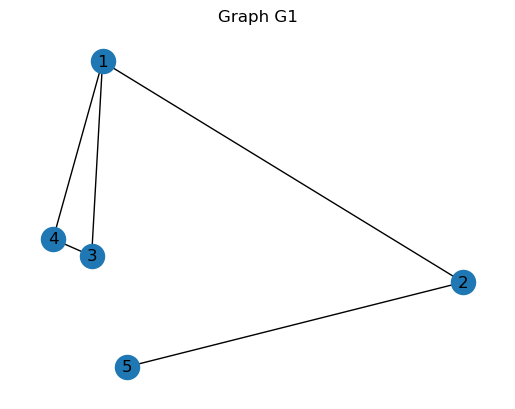

In [64]:
G1 = nx.Graph()

G1.add_edges_from(graph1)
plt.title("Graph G1")
nx.draw_random(G1, with_labels=True)
#nx.draw(G1)

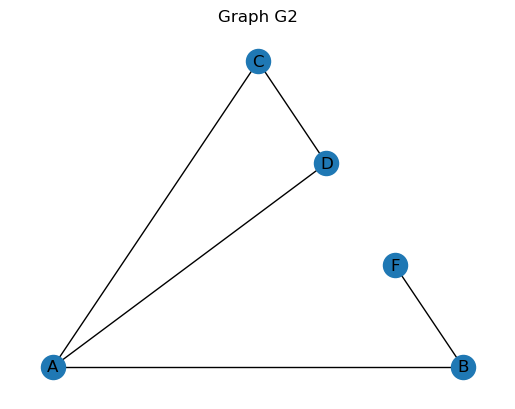

In [65]:
G2 = nx.Graph()

G2.add_edges_from(graph2)
plt.title("Graph G2")
nx.draw_planar(G2, with_labels=True)
#nx.draw(G2)


In [66]:
nx.is_isomorphic(G, G2)


False

These graphs have different numbers of edges and vertices, and no bijection between them. Therefore, G and G2 are not isomorphic.

In [67]:
nx.is_isomorphic(G1, G2)


True

Two graphs are isomorphic if they have the same "structure", but their vertices may have different labels. I have shown this is Graph G1 and graph G2. The answer is true that they are isomorphic. 

In the next part I will repersent graph in two different ways one by an edge-list and two by a adjacency matrix

##### Edge-list graph
You can add from a edge list which is a list of tuples and these tuples repersent edges, 
you can use the list to create a graph

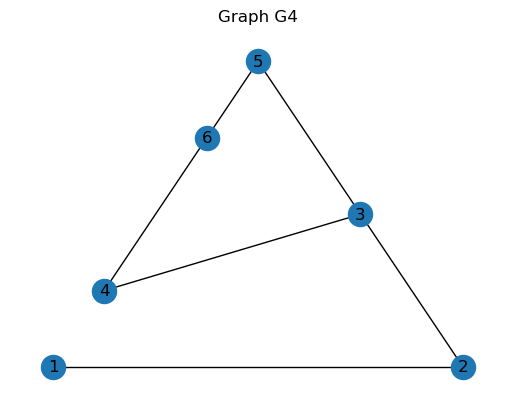

In [82]:

edge_list =[(1,2),(2,3),(3,4),(3,5), (5,6),(4,6)]
G4 = nx.Graph()
G4.add_edges_from(edge_list)
plt.title("Graph G4")
nx.draw_planar(G4, with_labels=True)


##### Adjacency matrix Graph 
Another way to repersent a graph is a adjacency matrix.
Each row and column in the matrix represents a vertex in the graph, 
and the entries in the matrix indicate whether there is an edge connecting the corresponding vertices.

In [3]:


G5 = nx.from_numpy_array(np.array([[0, 1, 0, 0, 0, 0],
                                  [1, 0, 1, 0, 0, 0],
                                  [0, 1, 0, 1, 1, 0],
                                  [0, 0, 1, 0, 0, 1],
                                  [0, 0, 1, 0, 0, 1],
                                  [0, 0, 0, 1, 1, 0]
                              ]))


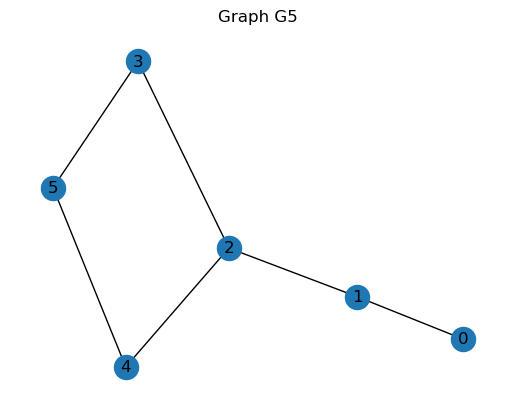

In [79]:
plt.title("Graph G5")
nx.draw_spring(G5, with_labels=True)
#plt.show


Graph G5 represented by a adjacency matrix and G4 represented by an edge-list, checking are they isomorphic. 
the answer is true, they are isomorphic 

In [80]:
#checking are they isomorphic
nx.is_isomorphic(G5, G4)


True

The is_isomorphic() function in NetworkX uses a variety of algorithms to efficiently test for graph isomorphism. The exact algorithm used depends on the size and properties of the input graphs. One of the algorithms used by nx is the VF2 algorithm.

In [2]:
# Define the adjacency matrix
adj_matrix = np.array([[0, 1, 0, 0, 1],
                       [1, 0, 1, 0, 0],
                       [0, 1, 0, 1, 0],
                       [0, 0, 1, 0, 1],
                       [1, 0, 0, 1, 0]])

# Create the graph from the adjacency matrix
G5 = nx.from_numpy_array(adj_matrix)


In [47]:
# Define the adjacency matrix
adj_matrix = np.array([[0, 1, 1, 1, 1, 1],
                       [1, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0]])

# Create the graph from the adjacency matrix
G5 = nx.from_numpy_array(adj_matrix)


In [10]:
# Generate all possible permutations of the node labels
perms = itertools.permutations(range(len(G5.nodes())))

# Iterate over each permutation and permute the adjacency matrix
for perm in perms:
    permuted_adj_matrix = adj_matrix[np.ix_(list(perm), list(perm))]
    permuted_G5 = nx.from_numpy_array(permuted_adj_matrix)

# tab the print to see all, will print last one for now
print(permuted_adj_matrix)


[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]


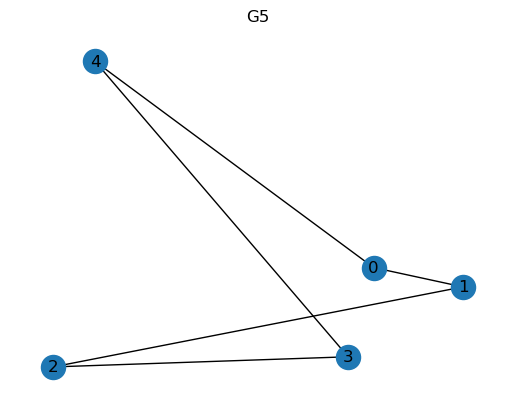

In [7]:
plt.title("G5")
nx.draw_random(G5, with_labels=True)



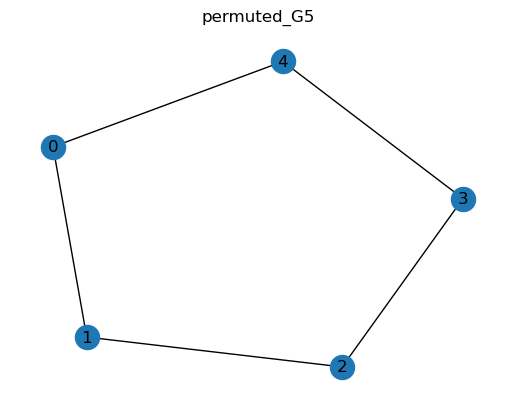

In [8]:
plt.title("permuted_G5")
nx.draw_spring(permuted_G5, with_labels=True)


In [9]:
# checking are they isomorphic
nx.is_isomorphic(G5, permuted_G5)


True

In [ ]:
#todo: print to file, search to see if any are not isomorphic, change them up a little
#todo: more theory 

#### References
- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isomorphism.vf2pp.vf2pp_is_isomorphic.html#networkx.algorithms.isomorphism.vf2pp.vf2pp_is_isomorphic
